In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, losses
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Layer
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
class Encoder(Layer):
    def __init__(self, filters=16, kernel_size=3, strides=2, **kwargs):
        super(Encoder, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
    
    def build(self, input_shape):
        self.conv2d1 = Conv2D(self.filters, self.kernel_size, activation='relu', padding='same', strides=self.strides)
    
    def call(self, inputs):
        x = self.conv2d1(inputs)
        return x

In [5]:
class Decoder(Layer):
    def __init__(self, size=2, kernel_size=3, **kwargs):
        super(Decoder, self).__init__(**kwargs)
        self.size = size
        self.kernel_size = kernel_size
    
    def build(self, input_shape):
        self.upsampling2d = UpSampling2D(size=self.size)
        self.conv2d = Conv2D(3, kernel_size=self.kernel_size, activation='sigmoid', padding='same')
    
    def call(self, inputs):
        x = self.upsampling2d(inputs)
        x = self.conv2d(x)
        return x

In [6]:
class AutoEncoder(Model):
    def __init__(self, encoding_dim=1024, **kwargs):
        super(AutoEncoder, self).__init__(**kwargs)
        self.encoder = Encoder(filters=16, kernel_size=3, strides=2, name="encoder")
        self.decoder = Decoder(size=2, kernel_size=3, name="decoder")
    
    def call(self, inputs):
        x = self.encoder(inputs)
        x = self.decoder(x)
        return x

In [7]:
autoencoder = AutoEncoder(name="autoencoder")

In [8]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [9]:
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.0055 - val_loss: 0.0016
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/10
1563/1563 [==============================] - 23s 14m

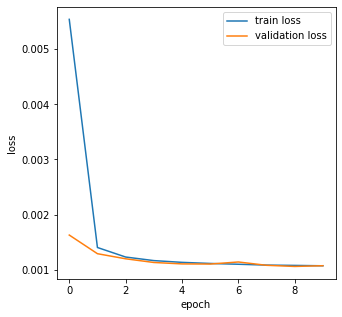

In [10]:
fig = plt.figure(figsize=(5, 5))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

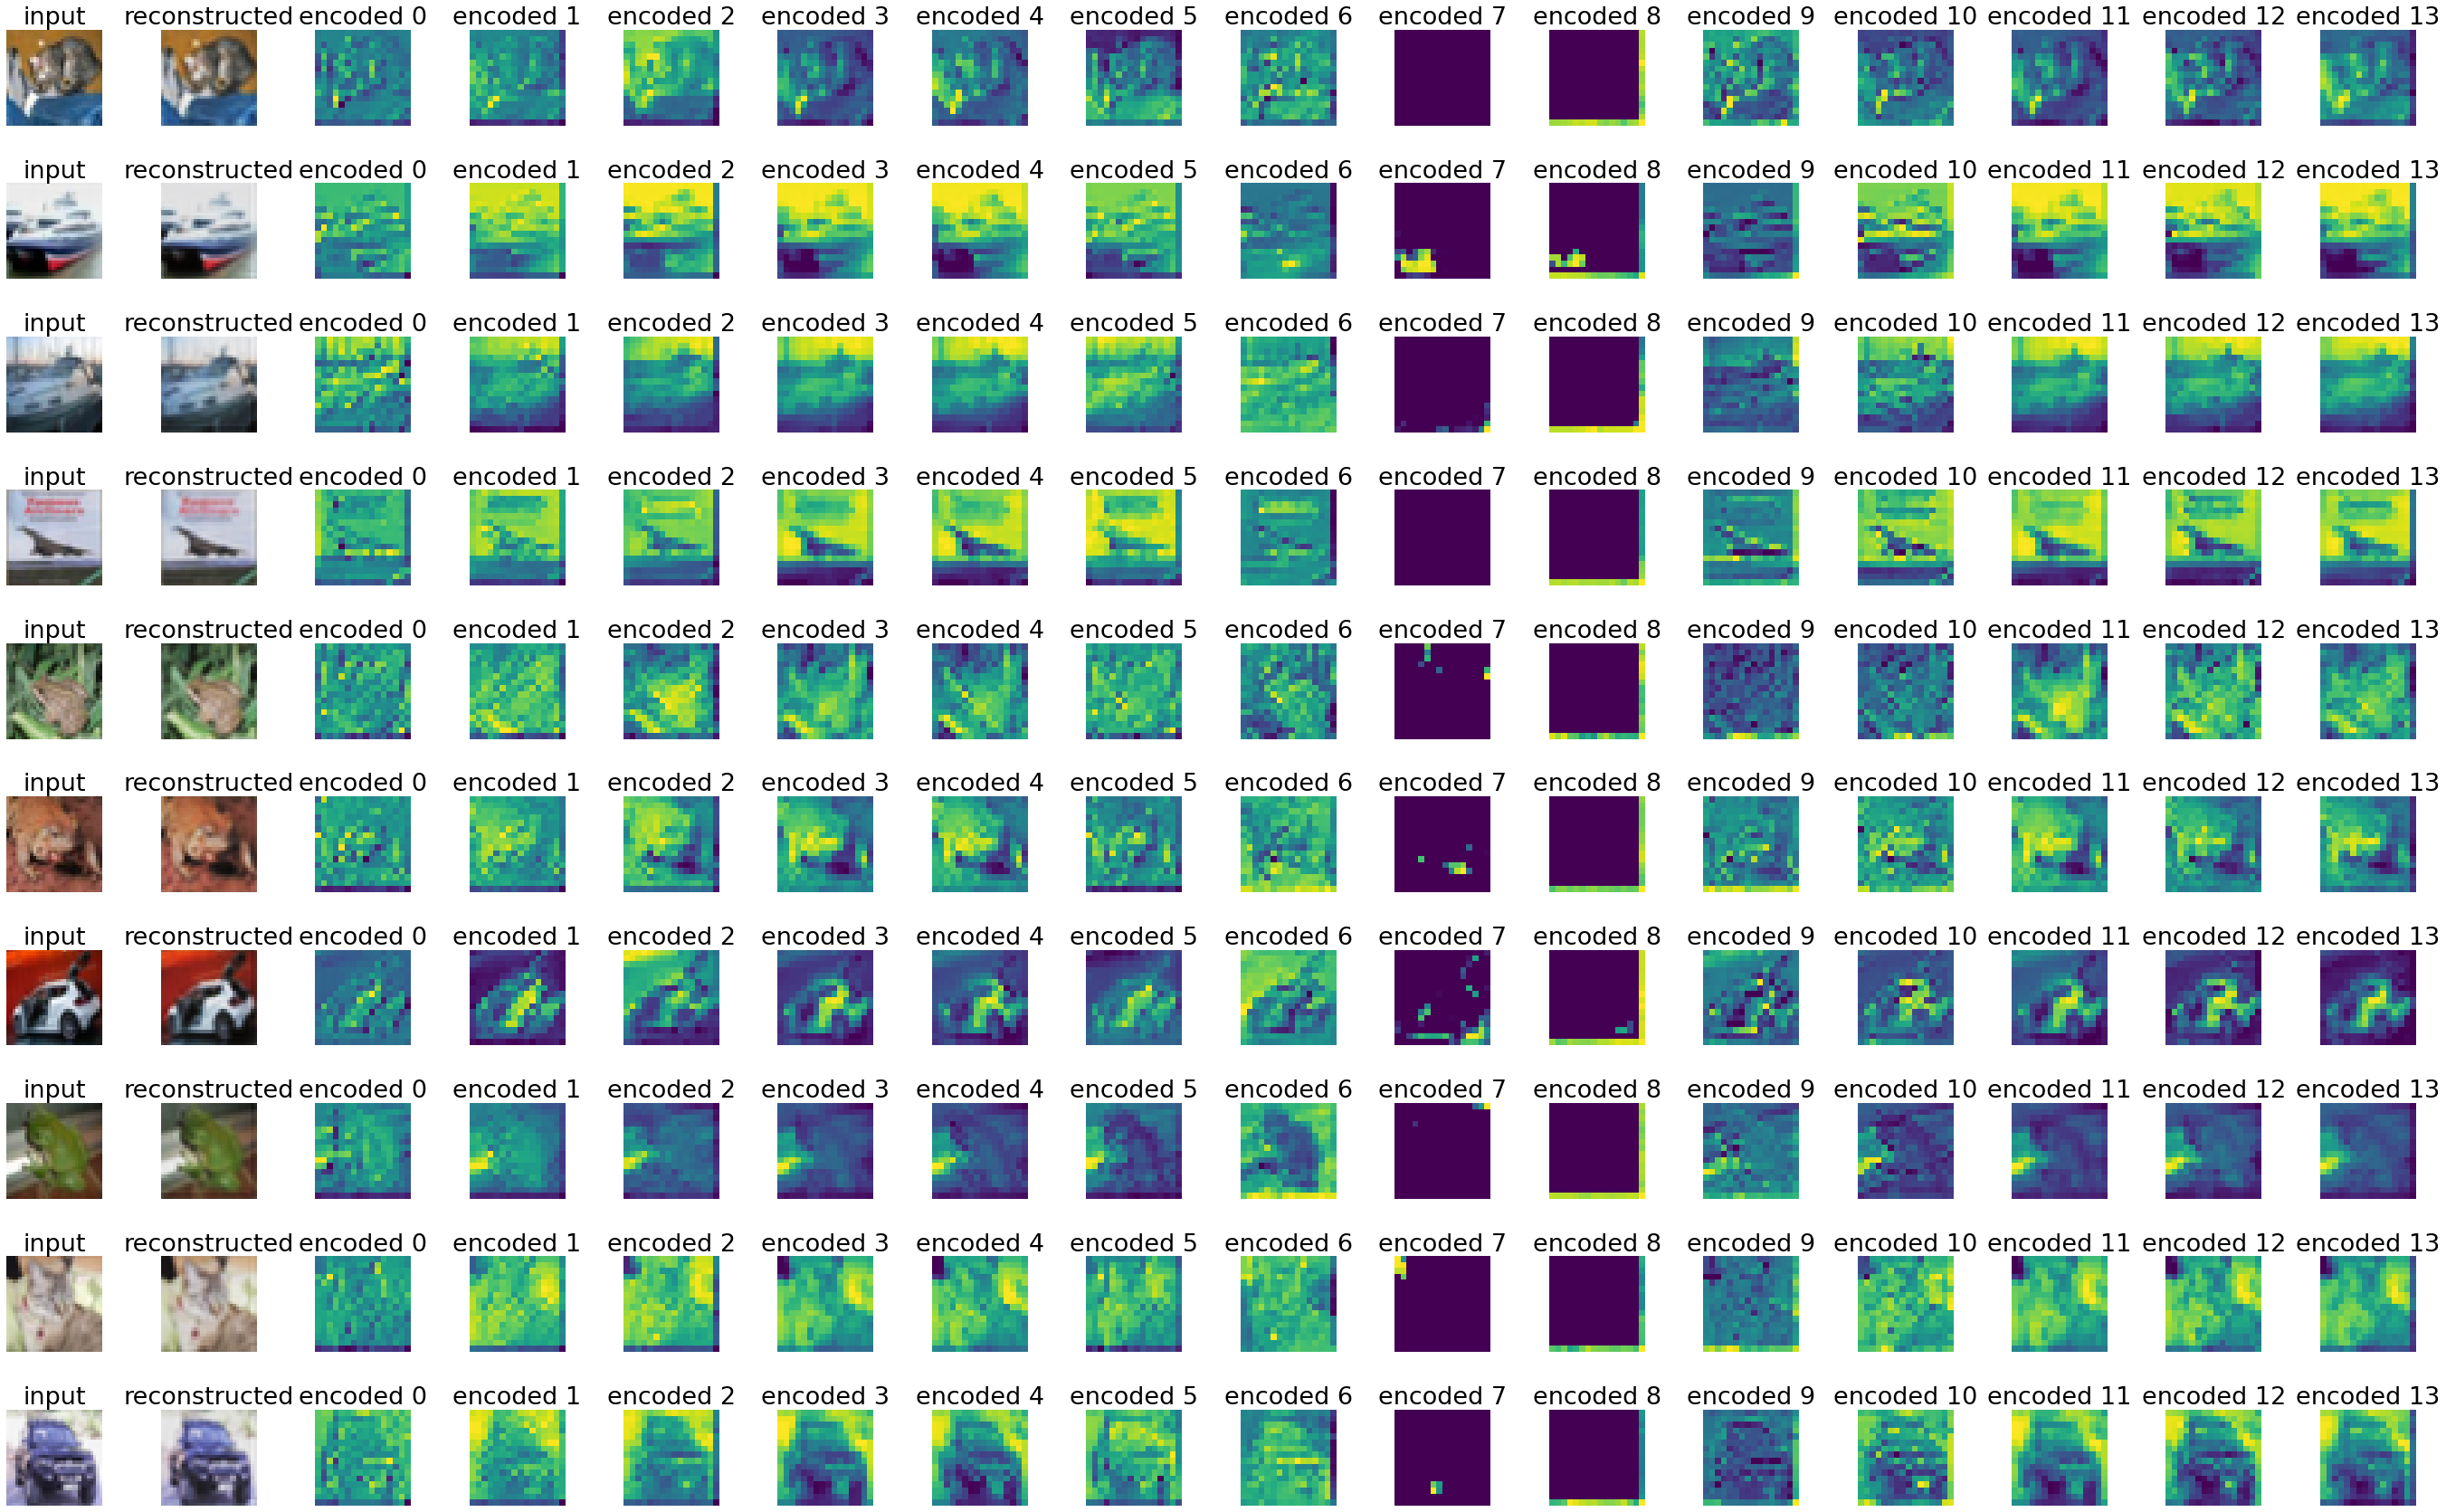

In [11]:
fig = plt.figure(figsize=(3 * 16, 3 * 10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(10):
    x = tf.expand_dims(x_test[i], 0)
    encoded = autoencoder.get_layer("encoder")(x)
    predicted = autoencoder.predict(x)
    ax1 = fig.add_subplot(10, 16, 16 * i + 1)
    ax1.axis('off')
    ax1.set_title('input', fontsize=27)
    ax1.imshow(x_test[i])
    ax2 = fig.add_subplot(10, 16, 16 * i + 2)
    ax2.axis('off')
    ax2.set_title('reconstructed', fontsize=27)
    ax2.imshow(predicted[0])
    for j in range(14):
        ax = fig.add_subplot(10, 16, 16 * i + j + 3)
        ax.axis('off')
        ax.set_title(f'encoded {j}', fontsize=27)
        ax.imshow(encoded[0, :, :, j])
plt.show()

In [12]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Encoder)            multiple                  448       
_________________________________________________________________
decoder (Decoder)            multiple                  435       
Total params: 883
Trainable params: 883
Non-trainable params: 0
_________________________________________________________________
